# Introduction to weighting scores

A common task or goal in verification is to understand how the accuracy of a model varies, or account for it.

One of the most common factors to take into account is that most data arrays don't represent equal amounts of physical area, particularly for one of the most common representations, the "LLXY" representation whereby each part of the array represents some even subdivision of latitude and longitude. Without going into the details on why this happens, what's important to know is that those apparently equal subdivisions of latitude do not represent an equal area. Lines of longitude are physically closer together nearer the poles, and are further apart where latitude equals zero.

Another common weighting is to account for the effect of accuracy on people, and so the results may be weighted by population density.

Weighting in this context means multiplying. In the scores package, the process is as follows:

1. Calculate the underlying error metric for the score (e.g. absolute error)
2. Multiply those errors by a factor supplied to the algorithm (for example, latitude weighting or population density)
3. Perform dimensionality reduction (e.g. calculate the mean) of the weighted value

It is important to realise that this factor can greatly distort the intuitive meaning of the scores. Latitude weighting apply a maximum weighting of 1 at the equator (so no change), and reduce the errors significantly towards the poles, as the area represented by each region also reduces significatly (going to zero in the extreme). Latitude weighting by cosine (the method implemented in this package) is inherently normalised between zero and one.

Population density, by contrast, may not be normalised naturally. It could be expressed as a number of people per kilometer. In this case, perhaps it's appropriate to weight by both population density AND latitude/area. Perhaps it would also be useful to mask out oceans and lakes, since those areas don't impact the population in the same way.

Sometimes, it's useful to calculate a few different perspectives at once. A more complex example might be to compare the latitude-weighted score to a population-weighted one, meaning both things need to be collected.

This notebook will go through some examples from the simple to the complex, showing both the importance and significance of considering weighting when calculating verification scores.


In [2]:
import scores
import xarray

In [4]:
fcst = xarray.open_dataset('forecast_grid.nc')
anal = xarray.open_dataset('analysis_grid.nc')

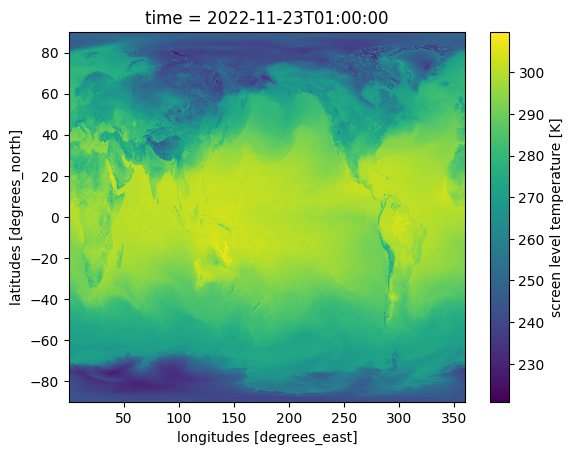

In [7]:
fcst.temp_scrn[72].plot()